```{txt name}
     Лада Шумакова
```

## 1. Универсальные лингвические иерархии: порядок прилагательных в новогреческом языке (стандартный и кипрский диалекты)  

Данные (социолингвистическая анкета и результаты эксперимента) взяты, с адаптацией, из исследования:
Leivada, Evelina; Westergaard, Marit, 2019, [Universal linguistic hierarchies are not innately wired](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6679903/pdf/peerj-07-7438.pdf). PeerJ, v.7.

Источник данных: репозиторий TROLLing:
Leivada, Evelina; Westergaard, Marit, 2019, "Replication Data for: Universal linguistic hierarchies are not innately wired", https://doi.org/10.18710/NTLLUF, DataverseNO, V1

#### Конструкции с двумя прилагательными

В английском языке порядок двух прилагательных в таких фразах, как:
```
 a big black bag # хорошо
*a black big bag # неприемлемо, грамматически неправильно или семантически аномально
```
определяется семантическим классом прилагательного (например, прилагательное «цвета» ближе к существительному, чем прилагательное «размера»).

Синтаксическая иерархия близости к существительному в универсальной грамматике Хомского предполагает следующий порядок, который считается врожденным и универсальным (= действительным для всех языков).
```
Subjective Comment > Evidential > Size > Length
> Height > Speed > Depth > Width > Temperature > Wetness > Age
> Shape > Color > Nationality/Origin > Material
# (на основе Scott, 2002: 114)
```
Цель исследования Leivada & Westergaard — определить, что происходит, когда люди воспринимают примеры с порядком, который либо соответствует иерархии, либо нарушает ее.

#### Метод

В первом эксперименте 140 нейротипичных взрослых носителей языка выполнили задание с выбором на время (a timed forced choice task), в котором использовались стимулы, представляющие комбинацию двух прилагательных и конкретного существительного (например, *Έπια ένα στενό ισπανικό βρασιόλι.* 'I bought a narrow Spanish bracelet.'). Были собраны данные двух типов:

(i) суждения о приемлемости по 3-балльной шкале Ликерта:
     1. неправильно,
     2. ни правильно, ни неправильно,
     3. правильный;

(ii) время реакции (RT).

В стимулах использовались три условия:  
1. прилагательное размера > прилагательное национальности,
2. прилагательное цвета > прилагательное формы,  
3. прилагательное субъективного комментария > прилагательное материала.

Каждое условие предъявлялось в двух вариантах порядка слов. При конгруэнтном порядке расположение пары прилагательных соответствовало тому, что диктует универсальная иерархия. В неконгруэнтном порядке порядок был обратным, поэтому иерархия была нарушена.

Во втором эксперименте 30 билингвов (носителей стандартного и кипрского греческого) были протестированы на обоих диалектах, по 36 наблюдений на участника, по 18 на каждый вариант.

В обоих экспериментах использовались два типа [филлеров] (https://www.hlp.rochester.edu/resources/BCS152-Tutorial/Fillers.html): FillerAcceptable и FillerUnacceptable — предложения, которые включали правильно построенные и неграмматические структуры, соответственно. В обеих задачах соотношение наполнителей к реальным тестовым структурам составляло 2:1. Смотри также [ключи к данным](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6679903/bin/peerj-07-7438-s001.txt).


#### Данные

Загрузите данные из [файла](https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/greek-word-order-mono-acceptability-coded-rt.txt") в переменную `mono`, переведя строковые данные в факторы. В переменной `mono_socio` сохраните данные социолингвистической [анкеты](https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/greek-word-order-mono-acceptability-coded-rt.txt), также переведя строковые данные в факторы.


In [76]:
# загрузка необходимых библиотек
install.packages('DescTools')
install.packages("car")
install.packages('rstatix')
install.packages('ggpubr')
install.packages('FSA')
library(FSA)
library(car)
library(tidyverse)
library(DescTools)
library(ggpubr)
library(rstatix)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# переменную RT перевела в число, поскольку это делает больше смысла
mono <- read_delim("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/greek-word-order-mono-acceptability-coded-rt.txt",
col_types = cols(RT = col_integer(), .default = col_factor()))
str(mono)

spc_tbl_ [7,560 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ParticipantID                 : Factor w/ 140 levels "00e0b159cf5b9abcc73b92506d8b1c38",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TypeOfQuestion                : Factor w/ 1 level "AcceptabilityJudgement": 1 1 1 1 1 1 1 1 1 1 ...
 $ TypeOfStimuli                 : Factor w/ 5 levels "Size-Nationality",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ WordOrder                     : Factor w/ 2 levels "Congruent","Incongruent": 1 2 1 2 1 2 1 2 1 2 ...
 $ ResponseAcceptabilityJudgement: Factor w/ 3 levels "Correct","Wrong",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ RT                            : int [1:7560] 1591 5504 1333 1543 1815 3059 1700 2745 3237 2911 ...
 - attr(*, "spec")=
  .. cols(
  ..   .default = col_factor(),
  ..   ParticipantID = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   TypeOfQuestion = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   TypeOfStimuli = col_factor(levels = NULL, ordered = FALSE, inclu

In [3]:
mono_socio <- read_delim("https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/greek-word-order-mono_socio.txt",
col_types = cols(.default = col_factor()))
str(mono_socio)

spc_tbl_ [180 × 4] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ParticipantID   : Factor w/ 30 levels "2bc93481d25426f259a0f1a3d5d3e824",..: 1 1 1 1 1 1 2 2 2 2 ...
 $ TypeOfQuestion  : Factor w/ 1 level "Form": 1 1 1 1 1 1 1 1 1 1 ...
 $ QuestionCategory: Factor w/ 6 levels "age","country1",..: 1 2 3 4 5 6 1 2 3 4 ...
 $ Responce        : Factor w/ 48 levels "58","Nicosia",..: 1 2 3 4 5 6 7 2 2 8 ...
 - attr(*, "spec")=
  .. cols(
  ..   .default = col_factor(),
  ..   ParticipantID = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   TypeOfQuestion = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   QuestionCategory = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE),
  ..   Responce = col_factor(levels = NULL, ordered = FALSE, include_na = FALSE)
  .. )
 - attr(*, "problems")=<externalptr> 


## Описание данных

### 1.1

Взглянем на данные `mono_socio`, чтобы ответить на следующие вопросы о социолингвистических характеристиках испытуемых:

1. Сколько участников указано в датафрейме?

2. Сколько из них женщин и мужчин?

3. Какие уровни образования указаны в датафрейме?

4. Сколько участников каждого уровня образования?

5. Сколько леворуких и праворуких участников?

Напишите код, представляющий ответы на эти вопросы в виде одной или нескольких таблиц.
Используйте функции из пакета tidyverse: `filter`, `group_by`, `count` and `distinct`.
(Еще один способ - использовать `pivot_wider`.)


In [4]:
# 1. количество участников
participants <- distinct(mono_socio['ParticipantID']) %>%
    count() %>%
    mutate(Responce = "Participants")

# 2. количество женщин и мужчин
sex <- mono_socio %>% filter(QuestionCategory == 'sex') %>%
  count(Responce)

# 3. уровни образования
education <- distinct(mono_socio %>%
  filter(QuestionCategory == 'education') %>%
  select(Responce))

# 4. количество участников каждого уровня образования
education_count <- mono_socio %>%
  filter(QuestionCategory == 'education') %>%
  count(Responce)

# 5. количество леворуких и праворуких участников
handedness <- mono_socio %>%
  filter(QuestionCategory == 'handedness') %>%
  count(Responce)

In [5]:
# склеиваем в единую табличку
descriptive_merged <- bind_rows(participants, sex, education_count, handedness) %>%
  pivot_wider(names_from = Responce, values_from = n)
descriptive_merged

Participants,female,male,College,UniversityDegree,Postgraduate,PhDongoing,right,left
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
30,19,11,3,12,14,1,28,2


### 1.2

Сравните полученную информацию с данными из таблицы 1 в [статье](https://pmc.ncbi.nlm.nih.gov/articles/PMC6679903/pdf/peerj-07-7438.pdf). Можно ли сказать, что данные, которые вы загрузили по ссылке, позволяют воспроизвести результаты этого исследования?


In [7]:
# код для проверки ряда штук
sex_article <- 66/74
sex_given <- descriptive_merged$male/descriptive_merged$female
print(paste("Соотношение по представителям разных полов в оригинальной статье: ",
sex_article))
print(paste("Соотношение по представителям разных полов в наших данных: ",
sex_given))

handedness_article <- 14/126
handedness_given <- descriptive_merged$left/descriptive_merged$right
print(paste("Соотношение по преобладающей руке в оригинальной статье: ",
handedness_article))
print(paste("Соотношение по преобладающей руке в наших данных: ",
handedness_given))

[1] "Соотношение по представителям разных полов в оригинальной статье:  0.891891891891892"
[1] "Соотношение по представителям разных полов в наших данных:  0.578947368421053"
[1] "Соотношение по преобладающей руке в оригинальной статье:  0.111111111111111"
[1] "Соотношение по преобладающей руке в наших данных:  0.0714285714285714"


```{txt 1.2}
1.2 ОТВЕТ
```
Во-первых, загруженная выборка (n = 30) в 7 раз меньше, чем представленная в статье (n = 140), и это уже проблема: длина доверительного интервала для истинного значения показателей в генеральной совокупности увеличивается.

Во-вторых, хотя в случае с полом и преобладающей руке сохранена общая тенденция (женщин больше, чем мужчин; праворуких больше, чем леворуких), не сохранены пропорции репрезентации, причем в случае с полом различие достаточно сильное (см. код выше).

В-третьих, в наших данных исключена информация о людях, имеющих среднее образование (представлены только респонденты с высшим образованием), однако их не очень много и в оригинальной статье (18 против 122).

Таким образом, загруженные данные, скорее, не позволяют воспроизвести результаты оригинального исследования.

### 1.3

Постройте график плотности, который показывает распределение RT в эксперименте в целом (для всех участников и условий. Отобразите красным пунктиром линию, показывающую среднее значение RT.


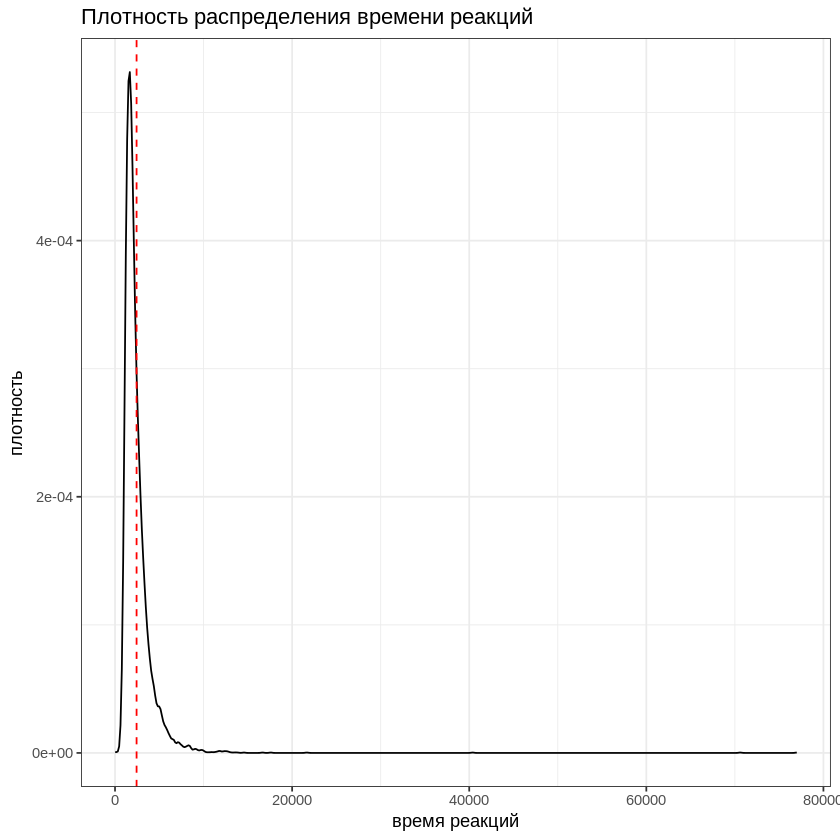

In [20]:
mono %>%
  ggplot(aes(x = RT)) +
  geom_density() +
  geom_vline(aes(xintercept = mean(RT)), color = "red", linetype = "dashed") +
  labs(title = 'Плотность распределения времени реакций',
x = 'время реакций',
y = 'плотность') +
  theme_bw()

### 1.4

Верно ли, что данные времени реакции нормально распределены? Есть ли в распределении длинные левые или правые хвосты??

In [8]:
# Тест Колмогорова-Смирнова, поскольку у нас большая выборка (n>5000)

ks.test(mono$RT, "pnorm", mean = mean(mono$RT), sd = sd(mono$RT))

Warning message in ks.test.default(mono$RT, "pnorm", mean = mean(mono$RT), sd = sd(mono$RT)):
“ties should not be present for the one-sample Kolmogorov-Smirnov test”



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  mono$RT
D = 0.20266, p-value < 2.2e-16
alternative hypothesis: two-sided


Согласно результатам теста Колмогорова-Смирнова на нормальность распределения данных, мы можем отвергнуть нулевую гипотезу на уровне значимости α = 0.05 (p-value < 2.2e-16).

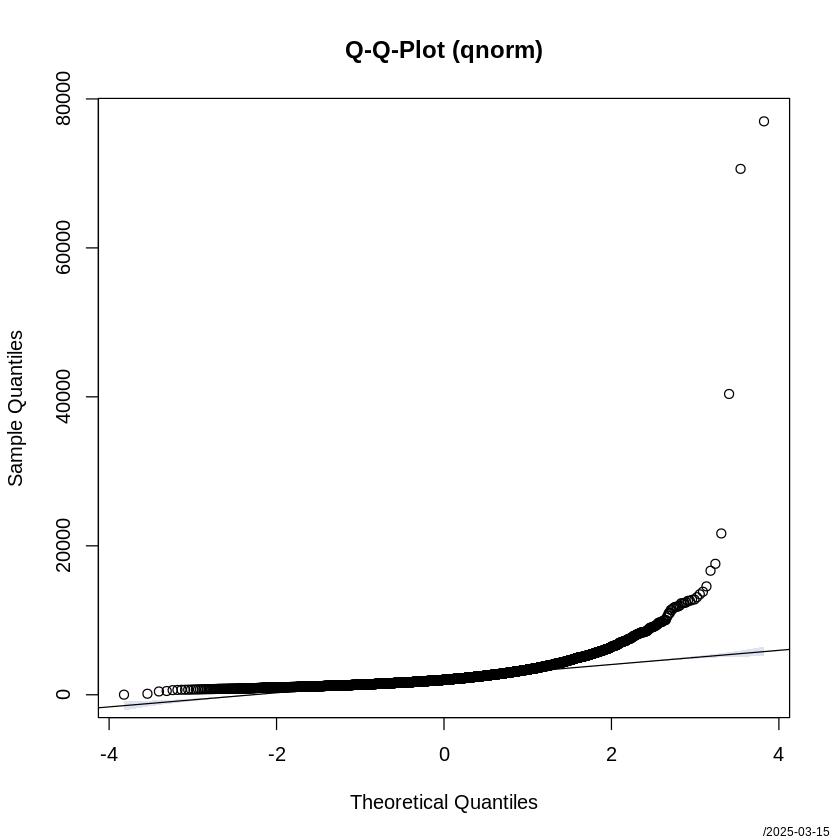

In [9]:
PlotQQ(mono$RT)

По графику можно увидеть большую ассиметрию вправо (ее не очень хорошо было видно на графике плотности), т. е. большой правый хвост.

### 1.5

Преобразуйте данные с помощью функциии логарифма (RTlog = log10(RT)).


In [10]:
mono$RTlog <- log10(mono$RT)
head(mono)

ParticipantID,TypeOfQuestion,TypeOfStimuli,WordOrder,ResponseAcceptabilityJudgement,RT,RTlog
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Congruent,Correct,1591,3.201670
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,5504,3.740678
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Congruent,Correct,1333,3.124830
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,1543,3.188366
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Congruent,Correct,1815,3.258877
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,3059,3.485579


### 1.6

Создайте график, похожий на 1.3, но показывающий логарифимированные значения RT.


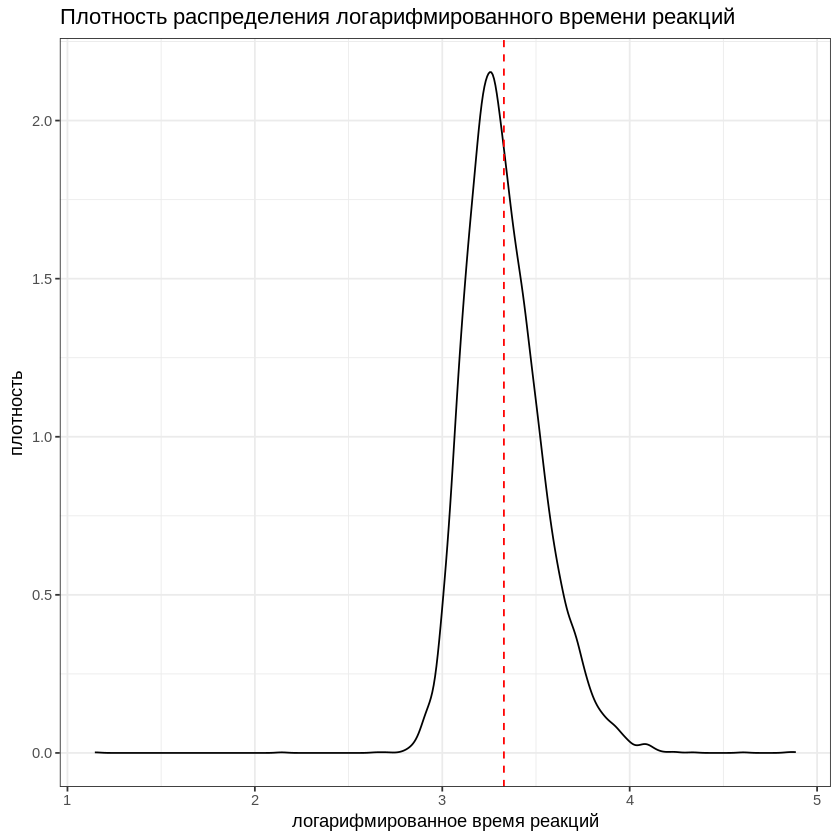

In [19]:
mono %>%
  ggplot(aes(x = RTlog)) +
  geom_density() +
  geom_vline(aes(xintercept = mean(RTlog)), color = "red", linetype = "dashed") +
  labs(title = 'Плотность распределения логарифмированного времени реакций',
x = 'логарифмированное время реакций',
y = 'плотность') +
    theme_bw()

### 1.7

Отфильтруйте выбросы:  
* автоматические ответы, время реакции на которые меньше 600 ms (будем полагать, что кнопка была нажата слишком быстро, еще до того, как у участника было достаточно времени рассмотреть показанный ему стимул и принять решение);  
* ответы, в которых RTlog отличается от среднего значения RTlog более, чем на 3 стандартных отклонения (SD);  
* филлеры (как приемлемые, так и неприемлемые).  
Сохраните очищенные от выбросов данные в переменную `mono1`.

In [21]:
mono1 <- mono %>%
  filter(RT >= 600,
RTlog < (mean(mono$RTlog) + 3*sd(mono$RTlog)),
RTlog > (mean(mono$RTlog) - 3*sd(mono$RTlog)),
TypeOfStimuli != 'FillerUnacceptable',
TypeOfStimuli != 'FillerAcceptable')
mono1

ParticipantID,TypeOfQuestion,TypeOfStimuli,WordOrder,ResponseAcceptabilityJudgement,RT,RTlog
<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Congruent,Correct,1591,3.201670
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,5504,3.740678
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Congruent,Correct,1333,3.124830
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,1543,3.188366
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Congruent,Correct,1815,3.258877
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,3059,3.485579
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Shape-Color,Congruent,Correct,1700,3.230449
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Shape-Color,Incongruent,Correct,2745,3.438542
00e0b159cf5b9abcc73b92506d8b1c38,AcceptabilityJudgement,Shape-Color,Congruent,Correct,3237,3.510143


### 1.8 Тест на разницу средних

Проанализируйте разницу в среднем значении RTlog у двух групп (порядок слов в стимуле: конгруэнтный vs неконгруэнтный). Сформулируйте нулевую и альтернативную гипотезу, аргументируйте, какой тип t-test'а или его аналогов следует применить, сделайте статистический и содержательный вывод о значимости различия.  

```{txt 1.8}
1.8 НУЛЕВАЯ И АЛЬТЕРНАТИВНАЯ ГИПОТЕЗЫ
```
H0: среднее логарифмированного времени реакций в группе испытаний с конгруэнтным порядком слов в стимуле такое же, как в группе испытаний с неконгруэнтным порядком слов в стимуле.

Н1: средние логарифмированного времени реакций в группах испытаний с конгруэнтным/неконгруэнтным порядком слов в стимуле отличаются.

Допушения t-test:
- нормальность распределения
- одинаковые дисперсии
- независимость значений (или пар значений)

In [22]:
# проверим нормальность распределения для всей переменной RTlog и по условиям
shapiro.test(mono1$RTlog)


	Shapiro-Wilk normality test

data:  mono1$RTlog
W = 0.98148, p-value < 2.2e-16


In [23]:
mono1_cong <- mono1 %>%
  filter(WordOrder == 'Congruent')

mono1_incong <- mono1 %>%
  filter(WordOrder == 'Incongruent')

shapiro.test(mono1_cong$RTlog)
shapiro.test(mono1_incong$RTlog)


	Shapiro-Wilk normality test

data:  mono1_cong$RTlog
W = 0.97688, p-value = 2.975e-13



	Shapiro-Wilk normality test

data:  mono1_incong$RTlog
W = 0.98502, p-value = 5.394e-10


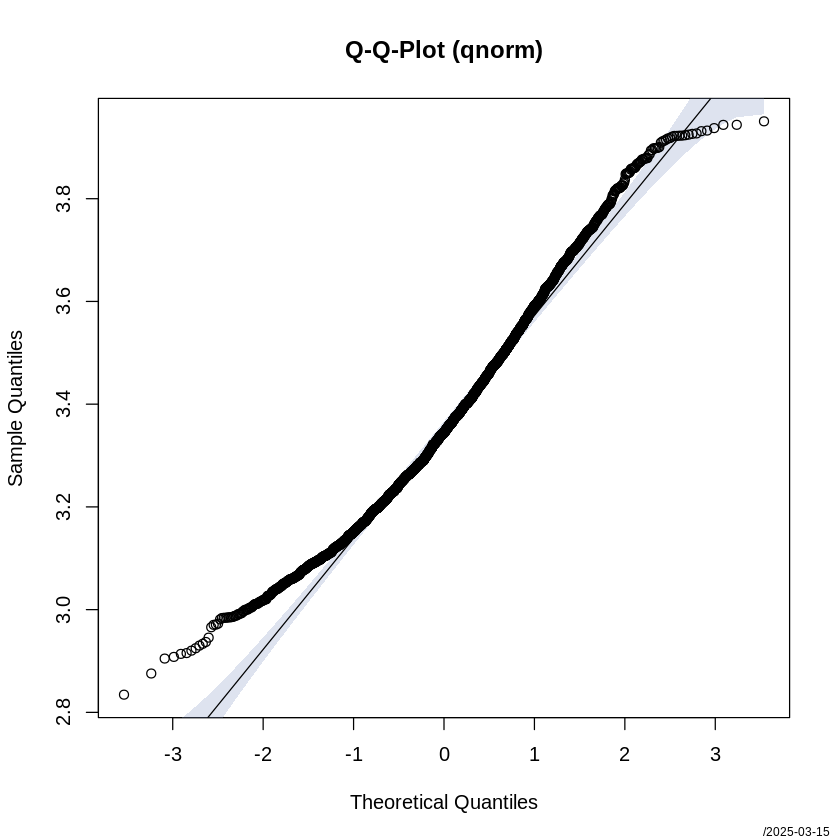

In [24]:
# проверим на графике
PlotQQ(mono1$RTlog)

Немного отходит от линии хвост справа. Тест Шапиро-Уилка показал ненормальность распределения (p-value < 2.2e-16), значит, необходимо использовать непараметрические аналоги t-test.

Было решено использовать парный тест Уилкоксона (поскольку в нашем случае мы предъявляем оба условия одним и тем же респондентам, а таргетная переменная непрерывна).

In [25]:
wilcox.test(mono1_cong$RTlog, mono1_incong$RTlog, paired = TRUE)

ERROR: Error in wilcox.test.default(mono1_cong$RTlog, mono1_incong$RTlog, paired = TRUE): 'x' and 'y' must have the same length


Кажется, у нас здесь не очень полные данные. Давайте искать, где ошибка.

In [27]:
nrow(mono1_cong)
nrow(mono1_incong)

[1] 1249

[1] 1239

На каждого респондента приходится по 18 строк (по 6 на все 3 условия). Следовательно, надо искать респондентов, у которых меньше испытаний.

In [28]:
mono1 %>%
  group_by(ParticipantID) %>%
    summarise(Num = n()) %>%
      filter(Num != 18)

ParticipantID,Num
<fct>,<int>
215534f5593230b3d84e97e8f6c95e08,16
313ac7af35b86e9e1ae8b51b2fff662a,17
31e6496931b3c5161057a3820a8435f1,16
6d4175156dbd671735742b3fc10bd336,17
6e948cf917cff18ae5b971d3f9ac4cf6,17
7d032f844f1c45ceed867ace66e7cc97,17
88f1984e454df103c8fb72784f87d4aa,17
89e7f472c986b5b7804544af21277a70,16
8a0c5d59c27542fb82f239161a0e53d8,17


Исключим этих респондентов из наших данных.

In [30]:
to_expel <- mono1 %>%
  group_by(ParticipantID) %>%
    summarise(Num = n()) %>%
      filter(Num != 18)

# новые датафреймы для теста Уилкоксона
mono1_expelled <- anti_join(mono1, to_expel, by='ParticipantID')
mono1_cong_expelled <- mono1_expelled %>%
  filter(WordOrder == 'Congruent')
mono1_incong_expelled <- mono1_expelled %>%
  filter(WordOrder == 'Incongruent')

# проверяем, что теперь длина данных равна
nrow(mono1_cong_expelled)
nrow(mono1_incong_expelled)

[1] 1098

[1] 1098

In [31]:
wilcox.test(mono1_cong_expelled$RTlog, mono1_incong_expelled$RTlog, paired = TRUE)


	Wilcoxon signed rank test with continuity correction

data:  mono1_cong_expelled$RTlog and mono1_incong_expelled$RTlog
V = 279679, p-value = 0.04101
alternative hypothesis: true location shift is not equal to 0


**Статистический вывод**

Результат теста Уилкоксона показал, что мы можем отвергнуть нулевую гипотезу о равенстве средних в двух группах на уровне значимости α = 0.05 (V = 279679, p-value = 0.04101).

**Содержательный вывод**

Результаты теста Уилкоксона (V = 279679, p-value = 0.04101) позволяют утверждать, что конгруэнтность порядка слов влияет на время реакций.

### 1.9

ANOVA. Проанализируйте разницу в среднем значении RTlog, сгруппировав данные по трем условиям
(прилагательное размера > прилагательное национальности, прилагательное цвета > прилагательное формы, прилагательное субъективного комментария > прилагательное материала) и по участнику. Сформулируйте нулевую и альтернативную гипотезу, аргументируйте, какой тип дисперсионного анализа следует применить, сделайте статистический и содержательный вывод о значимости различия. Это задание выполняется только для ответов при порядке слов Incongruent.  

```{txt 1.9}
1.9 ОТВЕТ
```
**Н0:** средние логарифмированного времени реакций в группах по условию не отличаются (то есть тип условия не влияет на время реакций).

**Н1:** между средними логарифмированного времени реакций в группах по условию есть различие (то есть тип условия влияет на время реакций).

Здесь надо использовать однофакторную ANOVA с повторными измерениями, поскольку каждый участник читал предложения во всех трех условиях (то есть мы сравниваем одну и ту же группу участников несколько раз). У этого анализа существует несколько допущений:
* непрерывность таргетной переменной **(выполнено, RTlog непрерывна)**
* номинальность независимой (группирующей) переменной **(выполнено, WordOrder категориальна)**
* гомогенность: дисперсия в группах должна быть ~ одинаковая **(будем проверять ниже при помощи теста Ливиня; UPD: проверено, дисперсия в группах одинакова)**
* нормальность распределения остатков (ошибок, residuals) **(будем проверять ниже при помощи QQ-плота; UPD: остатки распределены нормально)**
* гомогенность ковариации (сферичность): дисперсии разниц между условиями должны быть примерно одинаковыми **(будем проверять ниже при помощи теста Мочли; UPD: проверили, сферичность нарушена)**
* отсутствие значимых выбросов **(выбросы были исключены на шаге 1.7)**


In [70]:
# группировка данных
group_inc <- mono1_incong_expelled %>%
  group_by(ParticipantID, TypeOfStimuli) %>%
  aggregate(RTlog ~ ParticipantID + TypeOfStimuli, mean)

In [33]:
# проверка на гомогенность дисперсий
leveneTest(RTlog ~ TypeOfStimuli, data = group_inc)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,2.063618,0.128481
,363,NA,NA


Мы можем принять нулевую гипотезу о равенстве дисперсий в группах (p-value = 0.128481, df = 2).

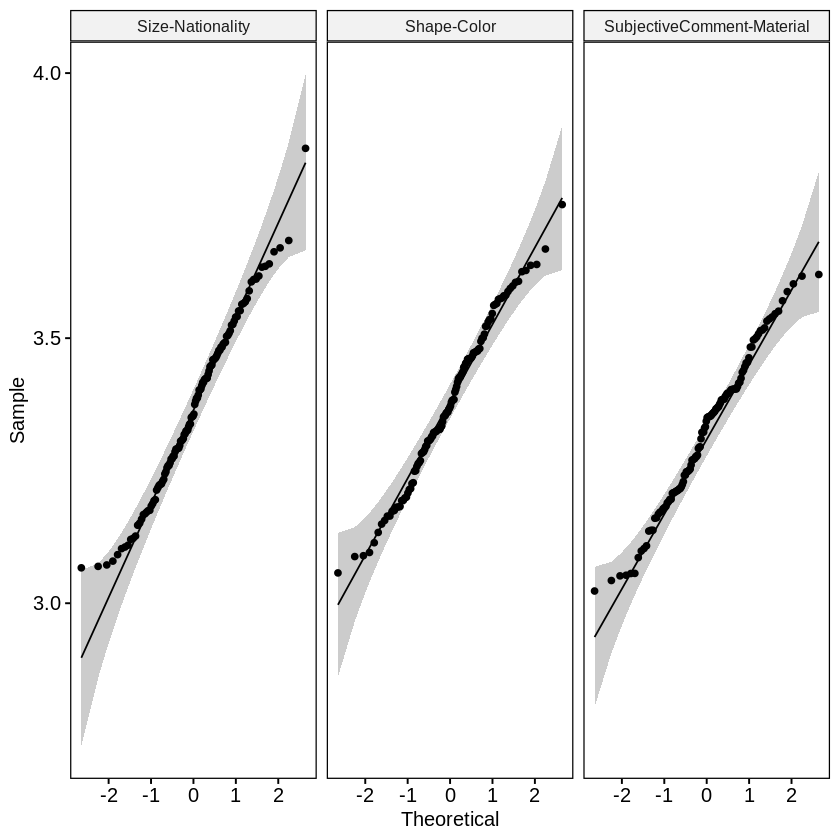

In [34]:
# проверка нормальности распределения остатков
ggqqplot(group_inc, "RTlog", facet.by = "TypeOfStimuli")

Визуально остатки распределены более-менее нормально.

In [35]:
# проверка на сферичность
anova_test(data = group_inc,
  dv = RTlog,
  wid = ParticipantID,
  within = TypeOfStimuli)

ANOVA Table (type III tests)

$ANOVA
         Effect DFn DFd      F       p p<.05   ges
1 TypeOfStimuli   2 242 14.343 1.3e-06     * 0.025

$`Mauchly's Test for Sphericity`
         Effect     W     p p<.05
1 TypeOfStimuli 0.929 0.012     *

$`Sphericity Corrections`
         Effect   GGe       DF[GG]    p[GG] p[GG]<.05   HFe       DF[HF]
1 TypeOfStimuli 0.933 1.87, 225.87 2.59e-06         * 0.947 1.89, 229.27
     p[HF] p[HF]<.05
1 2.24e-06         *

Тест Мочли показал, что сферичность нарушена (p-value = 2.59e-06).

В таком случае лучше использовать непараметрический аналог ANOVA, в нашем случае - тест Фридмана.


In [73]:
# кажется, в процессе у нас что-то поломалось, поэтому переделываю, чтобы работало
group_inc$TypeOfStimuli <- factor(group_inc$TypeOfStimuli)
group_inc$ParticipantID <- factor(group_inc$ParticipantID)

friedman.test(RTlog ~ TypeOfStimuli | ParticipantID, data = dfdata)


	Friedman rank sum test

data:  RTlog and TypeOfStimuli and ParticipantID
Friedman chi-squared = 19.197, df = 2, p-value = 6.784e-05


**Статистический вывод**

Применив критерий Фридмана, мы не можем отвергнуть нулевую гипотезу о равенстве средних во всех трех группах на уровне значимости α = 0.05 (p-value = 6.784e-05, df = 2).

**Содержательный вывод**

Не наблюдается статистически значимой разницы во времени реакций на приемлемость порядка различных прилагательных при их неконгруэнтном порядке.

### 1.10 Post-hoc тест

Примените TukeyHSD тест, чтобы выяснить, какие конкретно пары условий TypeOfStimuli отличаются друг от друга по среднему значению RTlog.  
Это задание, аналогично, выполняется только для ответов при порядке слов Incongruent.

У меня возникла проблема, что TukeyHSD не пременяется для ANOVA с повторными измерениями (и ее непараметрических аналогов), но применяется для one-way ANOVA. Это может говорить о том, что я выбрала тест неправильно, но, поскольку тут у нас не несколько групп испытуемых в разных условиях, а одна и та же, в реальном исследовании я бы все еще делала бы тест Фридмана.

Для выполнения данного задания я сделаю сейчас также one-way ANOVA со всеми выводами (отдельно замечу, что для этого у нас как раз выполняются все допущения, в отличие от ANOVA с повторными измерениями).

Также я сделаю post-hoc тест для Фридмана, используя тест Данна.

#### One-way ANOVA и TukeyHSD тест


In [78]:
one_way_anova <- anova_test(data = group_inc, dv = RTlog, between = TypeOfStimuli)
one_way_anova

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,TypeOfStimuli,2,363,4.743,0.009,*,0.025


**Статистический вывод для one-way ANOVA**

Мы можем отвергнуть нулевую гипотезу о равенстве средних во всех трех группах на уровне значимости α = 0.05 (p-value < 2.2e-16).

**Содержательный вывод для one-way ANOVA**

Наблюдается статистически значимая разница между временем реакций на приемлемость порядка различных прилагательных при их неконгруэнтном порядке. По этой причине, если бы данные были воспроизводимы для оригинального исследования, авторам пришлось бы проводить свой эксперимент заново, поскольку условия оказались неравнозначными.


In [79]:
model <- aov(group_inc$RTlog ~ group_inc$TypeOfStimuli)

In [80]:
TukeyHSD(model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = group_inc$RTlog ~ group_inc$TypeOfStimuli)

$`group_inc$TypeOfStimuli`
                                                   diff         lwr
Shape-Color-Size-Nationality                 0.01339625 -0.03221907
SubjectiveComment-Material-Size-Nationality -0.04368464 -0.08929996
SubjectiveComment-Material-Shape-Color      -0.05708089 -0.10269621
                                                     upr     p adj
Shape-Color-Size-Nationality                 0.059011570 0.7688222
SubjectiveComment-Material-Size-Nationality  0.001930679 0.0638238
SubjectiveComment-Material-Shape-Color      -0.011465573 0.0096098


#### Интерпретация post-hoc для one-way ANOVA

```{txt 1.10a}
1.10а ИНТЕРПРЕТАЦИЯ POST-HOC ТЕСТА
```
Post-hoc тест Тьюки показал, что есть статистически значимая разница между средними выборок `SubjectiveComment-Material` и `Shape-Color` (p-value = 0.0096098).

Между группами `Shape-Color`  и `Size-Nationality` (p-value = 0.7688222); `SubjectiveComment-Material` и `Size-Nationality` статистически значимой разницы в средних не наблюдается (p-value = 0.0638238).

#### Фридман и тест Данна



In [90]:
dunnTest(RTlog ~ TypeOfStimuli, method = "bonferroni", data = group_inc)

Dunn (1964) Kruskal-Wallis multiple comparison

  p-values adjusted with the Bonferroni method.




                                     Comparison         Z     P.unadj
1                Shape-Color - Size-Nationality 0.7424491 0.457815267
2      Shape-Color - SubjectiveComment-Material 2.7737464 0.005541487
3 Size-Nationality - SubjectiveComment-Material 2.0312972 0.042224852
       P.adj
1 1.00000000
2 0.01662446
3 0.12667456

#### Интерпретация post-hoc для Фридмана

```{txt 1.10a}
1.10а ИНТЕРПРЕТАЦИЯ POST-HOC ТЕСТА
```
Post-hoc тест Данна показал, что есть статистически значимая разница между средними выборок `Shape-Color` и `SubjectiveComment-Material` (p-value = 0.005541487); `SubjectiveComment-Material` и `Size-Nationality` (p-value = 0.042224852).

Между группами `Shape-Color`  и `Size-Nationality`статистически значимой разницы в средних не наблюдается (p-value = 0.457815267).